영문 분석 -> 워드 클라우드로 그리기(시각화)
샘플 데이터 영문 학술 문서의 제목만 추출, 그 단어의 빈도 분석 시각화
데이터 수집 : Big data 키워드로 검색 후, 해당 학술 연구 정보 서비스에서 수집 해보기.
조합, pandas.concat(), 정제 re 정규식(필터), 기본적인 유효성 체크.
변환 : word_tokenize(), lower(),
matplotlib.pyplot 이용하기.
단어 빈도 구해주는 Counter() 이용.
비정형 빅데이터 분석을 말하고 -> 자연어 처리 (nature language processing )
자연어 처리 예) 음성, 텍스트 정보 추출.
단어 빈도를 추출해서, 해당 단어 시각화하기.


[관련 단어 용어 정리]
텍스트 분석: 자연어 처리와 데이터 마이닝 결합하여 발전되었고,
비정형 텍스트 데이터에서 정보를 추출하는 분석 방법.
분석 방법 : 1) 텍스트 분류 2) 텍스트 군집화 3) 감성 분석.
전처리 : 분석 작업의 정확도를 높이기 위해서 사용할 데이터 정리하고 변환하는 작업.
수행하는 작업
정제 (cleaning): 불필요한 기호, 문자 필터하는 작업, 정규식을 이용해서 작업을 함.
정규화 (normallization) : 형태가 다른 단어를 특정의 형태로 변환 작업 , 대문자, 소문자 통합 하는 작업, 의미가 비슷한 단어끼리 통합작업.
토큰화 (tokenization) : 토큰으로 정하는 기본 단위로 분리 작업. 문장 기준, 단어 기준이 될수 도 있다.
불용어제거(stopword) : 의미 있는 단어를 추출하기 위해서, 조사, 관사, 접미사, 접두사 등. 제거하는 작업.
어간 추출(semming) : 단수, 복수, 진행형(시제), 분리하는 작업
표제어 추출(lemmatization ): 단어의 기본형 형태로 일반화 하는 작업.
예)
Gone -> go
am -> be
going -> go
워드클라우드 : 텍스트 분석에서 빈도를 시각화 할 때 많이 사용됨.
데이터 수집
한국교육학술정보원 (KERIS)의 RISS 사이트
https://www.riss.kr/index.do
Big data 검색해보기.
한 페이지당 100개씩 내보내기 엑셀 파일 간략 정보 , 반복 10번
1000개의 데이터에서 제목만 추출 및 분류 작업하기.
데이터 준비 작업.
제목 컬럼 빈도 분석 해보기.

nltk=Natural Language Toolkit

In [2]:
# 관련 패키지들 임포트 하기. 
import pandas as pd 
# 경로 이름 지정해서 파일 처리할 때 사용하는 도구
import glob 
# 정규 표현식에 사용하는 도구 
import re 
# 2차원 리스트를 -> 1차원 리스트로 차원 축소시 사용하는 도구 
from functools import reduce
# 자연어 처리 패키지 중에서, 단어 토큰화 작업.
from nltk.tokenize import word_tokenize
# 불용어 처리 작업. 
from nltk.corpus import stopwords 
# 표제어 추출 
from nltk.stem import WordNetLemmatizer 
# 단어의 빈도를 추출하는 도구. 
from collections import Counter 
import matplotlib.pyplot as plt
# 단어의 빈도수를 시각화하는 도구, 빈도가 높을수록 글자 크기가 커짐. 
from wordcloud import STOPWORDS, WordCloud 


In [3]:
# 데이터 조합(병합)하기. 
# 현재 폴더 내부에 있는 , 받았던 엑셀 파일명 10개를 선택하기. 
all_files = glob.glob("./myCabinetExcelData*.xls")
all_files

# 엑셀 파일 읽어서 -> 데이터 프레임 (표형태) 변환 ->특정 리스트에 담아두기 
# 임시로 저장할 리스트 변수 
all_files_data = []

# all_files 에 담겨진 엑셀 파일의 위치가 들어있고, 
# 해당 위치의 엑셀 파일을 읽어서, 데이터 프레임 표 형태로 변환하기. 
# 임시 리스트에 담기. 
for file in all_files:
  # 해당 엑셀 파일의 위치의 물리 파일 읽기
  data_frame = pd.read_excel(file)
  # 임시 리스트에 담기. 
  all_files_data.append(data_frame)

# 샘플 확인 해보기., 첫번째 요소 확인 해보기. 
# all_files_data = [엑셀1,엑셀2,엑셀3,...엑셀10]
all_files_data[0]

# 오류 발생, 모듈 미설치 : xlrd
# cmd -> pip install xlrd 

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big-Data Challenge Advances highlight big issues,unknown,BEIJING REVIEW,2014
1,NaN,2,Big-Data-Driven Stem Cell Science and Tissue E...,"Del Sol, Antonio; Thiesen, Hans J.; Imitola, J...",ELSEVIER SCIENCE B.V; AMSTERDAM,2017
2,NaN,3,Big-data driven functional interaction pattern...,"Zheng, Minrui",SCIENCE PRESS,2022
3,NaN,4,Big-Data and Simulations of Social and Economi...,"Takayasu, H.",JAPAN TECHNICAL INFORMATION SERVICE,2014
4,NaN,5,Big-Data Science: Infrastructure Impact,"Monga, Inder; Prabhat,",INDIAN NATIONAL SCIENCE ACADEMY,2018
...,...,...,...,...,...,...
95,NaN,96,Careers: Graduate programs for big-data analysts,unknown,IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2013
96,NaN,97,PMU121 APPLICATION OF REAL-WORLD DATA FROM MED...,"Wang, Y.; Xing, Y.; Wu, Y.; Yuan, N.; Wang, F....","Elsevier Science B.V., Amsterdam",2020
97,NaN,98,Design and Implementation of Big-Data Analysis...,"Zhang, Pan; Ding, Lingyun; Jiang, Ning; Ling, ...","Elsevier Science B.V., Amsterdam",2018
98,NaN,99,Performance Meta-analysis for Big-Data Univari...,"Stefanopoulou, Aliki",Springer,2022


In [4]:
# 엑셀 파일 10개를 병합해서 출력해보기. 
# axis=0 , 세로 방향으로 , 밑으로 데이터를 붙이는 작업. 
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
print(f"all_files_data_concat.shape : {all_files_data_concat.shape}")

# 병합된 파일을 csv 파일로 변환하기. 
all_files_data_concat.to_csv("./riss_Bigdata.csv", encoding="utf-8", index=False)


all_files_data_concat.shape : (1000, 6)


In [5]:
import nltk
nltk.download('punkt')
# import nltk
# from nltk.corpus import stopwords

# # Download NLTK stopwords data
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/u020/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# 엑셀 파일 10개를 병합해서 출력해보기. 
# axis=0 , 세로 방향으로 , 밑으로 데이터를 붙이는 작업. 
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
print(f"all_files_data_concat.shape : {all_files_data_concat.shape}")

# 병합된 파일을 csv 파일로 변환하기. 
all_files_data_concat.to_csv("./riss_Bigdata.csv", encoding="utf-8", index=False)

all_files_data_concat.shape : (1000, 6)


In [7]:
# 전처리 작업 하기. 
# 데이터 프레임에서 제목 열만 추출 
all_title = all_files_data_concat["제목"]
all_title

#불용어 제거 
# set(), 기본적으로 중복 제거 
stopWords = set(stopwords.words("english"))

# lemma 작업 -> 표제어 추출, 영어, 시제를 제거하고, 원형(사전식 단어 추출)
lemma = WordNetLemmatizer()

In [11]:
# 임시로 담을 변수, 
words = []

# 기본적인 , 단어 추출(전처리 작업.)
for title in all_title:
  # 영문자, 대 소문자를 제외한 나머지 문자는 모두 공백으로 처리하겠다. 
  print(f"과정1 title 원본: {title}")
  enWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
  print(f"과정2 title enWords(re: 대소문자남기기): {enWords}")
  # 남은 영문자를 -> 모두 소문자 변환하고 -> 각단어를 토큰으로 각각 분리 작업. 
  enWordsToken = word_tokenize(enWords.lower())
  print(f"과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): {enWordsToken}")
  # 컴프리헨션 파이썬 스타일 코드로 , 리스로 변경하기. 
  
  # 불용어 제거 작업, 조사, 관사 등 제거하는 작업. -> 오타:stopwords -> stopWords
  enWordsTokenStop= [w for w in enWordsToken if w not in stopWords]
  print(f"과정4 title enWordsTokenStop(불용어 제거): {enWordsTokenStop}")

  # 표제어 추출 작업. 
  enWordsTokenStopLemma = [lemma.lemmatize(w) for w in enWordsTokenStop]
  print(f"과정5 title enWordsTokenStopLemma(표제어 추출 작업 후): {enWordsTokenStopLemma}")

  words.append(enWordsTokenStopLemma)
  
print(f"words(전처리, re 정규식, token화, stop 불용어 제거, 표제어 추출) : {words}")

과정1 title 원본: Big-Data Challenge Advances highlight big issues
과정2 title enWords(re: 대소문자남기기): Big Data Challenge Advances highlight big issues
과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): ['big', 'data', 'challenge', 'advances', 'highlight', 'big', 'issues']
과정4 title enWordsTokenStop(불용어 제거): ['big', 'data', 'challenge', 'advances', 'highlight', 'big', 'issues']
과정5 title enWordsTokenStopLemma(표제어 추출 작업 후): ['big', 'data', 'challenge', 'advance', 'highlight', 'big', 'issue']
과정1 title 원본: Big-Data-Driven Stem Cell Science and Tissue Engineering: Vision and Unique Opportunities
과정2 title enWords(re: 대소문자남기기): Big Data Driven Stem Cell Science and Tissue Engineering Vision and Unique Opportunities
과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): ['big', 'data', 'driven', 'stem', 'cell', 'science', 'and', 'tissue', 'engineering', 'vision', 'and', 'unique', 'opportunities']
과정4 title enWordsTokenStop(불용어 제거): ['big', 'data', 'driven', 'stem', 'cell', 'science', 'tissue', 'engineering', 'visi

In [12]:
# 2차원 리스트 -> 1차원 리스트. 차원축소 
# reduce 함수 이용하기 차원축소 
# list 함수이용해서 , 1차원 리스트로 만들기 
# 단일 목록으로 연결
result = reduce(lambda x,y :x+y ,words)
# result
words2 = list(result)
print(f"result 타입조사 :{type(words2)}")
print(f"words2:{words2}")

['big',
 'data',
 'challenge',
 'advance',
 'highlight',
 'big',
 'issue',
 'big',
 'data',
 'driven',
 'stem',
 'cell',
 'science',
 'tissue',
 'engineering',
 'vision',
 'unique',
 'opportunity',
 'big',
 'data',
 'driven',
 'functional',
 'interaction',
 'pattern',
 'governance',
 'strategy',
 'beijing',
 'tianjin',
 'hebei',
 'region',
 'big',
 'data',
 'simulation',
 'social',
 'economic',
 'system',
 'prospect',
 'econophysics',
 'study',
 'big',
 'data',
 'science',
 'infrastructure',
 'impact',
 'big',
 'data',
 'science',
 'infrastructure',
 'impact',
 'big',
 'data',
 'validierungsplattform',
 'f',
 'r',
 'methoden',
 'zur',
 'teil',
 'automatisierten',
 'felddatenanalyse',
 'big',
 'data',
 'gesch',
 'ftsmodelle',
 'die',
 'drei',
 'seiten',
 'der',
 'medaille',
 'big',
 'data',
 'analysis',
 'phase',
 'formation',
 'rule',
 'high',
 'entropy',
 'alloy',
 'big',
 'data',
 'theoretical',
 'engineering',
 'analytics',
 'perspective',
 'big',
 'data',
 'based',
 'power',
 'batt

In [10]:
# 데이터 탐색, 기본 분석  모델 만들기 
#Counter -> 해당 단어 빈도 집계해주는 함수
count = Counter(words2)
count

Counter({'data': 1233,
         'big': 1113,
         'analytics': 117,
         'based': 106,
         'analysis': 98,
         'system': 69,
         'driven': 66,
         'using': 57,
         'approach': 56,
         'issue': 46,
         'model': 45,
         'learning': 44,
         'application': 41,
         'challenge': 39,
         'new': 38,
         'management': 38,
         'special': 37,
         'platform': 36,
         'health': 34,
         'algorithm': 34,
         'science': 33,
         'call': 33,
         'paper': 33,
         'framework': 32,
         'era': 32,
         'cloud': 31,
         'research': 30,
         'network': 28,
         'processing': 28,
         'mining': 27,
         'computing': 26,
         'smart': 25,
         'method': 25,
         'earth': 25,
         'business': 24,
         'service': 24,
         'performance': 24,
         'study': 23,
         'information': 23,
         'intelligence': 23,
         'distributed': 23,
        

In [14]:
# 임시 딕셔너리 만들기 
word_count=dict()

# 상위 50개 정도만 추출해보기 반복문을 통래서 태그에는 단어 , count 에는 갯수 
for tag, counts in count.most_common(50):
    if(len(str(tag))>1): 
        word_count[tag]=counts
        print(f"tag:{tag},counts:{counts}")  
# word_count        
# tag: count     

tag:data,counts:1233
tag:big,counts:1113
tag:analytics,counts:117
tag:based,counts:106
tag:analysis,counts:98
tag:system,counts:69
tag:driven,counts:66
tag:using,counts:57
tag:approach,counts:56
tag:issue,counts:46
tag:model,counts:45
tag:learning,counts:44
tag:application,counts:41
tag:challenge,counts:39
tag:new,counts:38
tag:management,counts:38
tag:special,counts:37
tag:platform,counts:36
tag:health,counts:34
tag:algorithm,counts:34
tag:science,counts:33
tag:call,counts:33
tag:paper,counts:33
tag:framework,counts:32
tag:era,counts:32
tag:cloud,counts:31
tag:research,counts:30
tag:network,counts:28
tag:processing,counts:28
tag:mining,counts:27
tag:computing,counts:26
tag:smart,counts:25
tag:method,counts:25
tag:earth,counts:25
tag:business,counts:24
tag:service,counts:24
tag:performance,counts:24
tag:study,counts:23
tag:information,counts:23
tag:intelligence,counts:23
tag:distributed,counts:23
tag:opportunity,counts:22
tag:perspective,counts:22
tag:optimization,counts:22
tag:machine

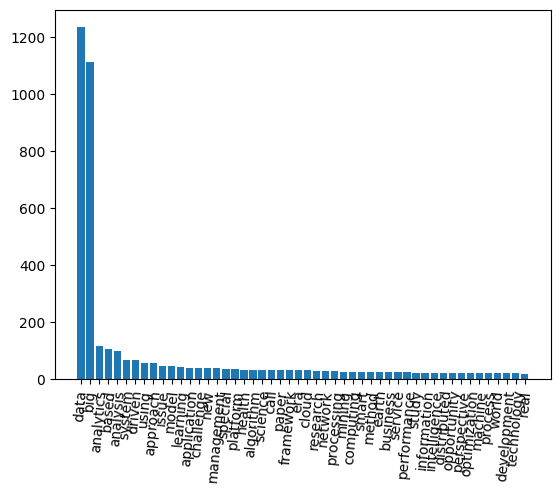

In [44]:
#추출 상위 50개 단어 시각화하기 
#막대그래프 
# word_count : 상위 50개단어 추출한 딕셔너리 : map과 비슷하고 key:value
# 기본이 오름차순인데 reverse 내림차순스 
sorted_Keys=sorted(word_count,key=word_count.get,reverse=True)
sorted_Values=sorted(word_count.values(),reverse=True)

# 그림그리러 감 x축: range(len(word_count))
plt.bar(range(len(word_count)),sorted_Values,align='center')
# 눈금옵션 조정 x축 라벨 붙이기 작업 
# 세로 방향으로 ( 라벨링 글자를 ) 기울이기 
plt.xticks(range(len(word_count)),list(sorted_Keys),rotation=85)
plt.show()

In [46]:
# 꺾은선 그래프 
# 기존 데이터 프레임에 새로운 컬럼(doc_count) 추가 , 임의로 0으로 값 넣기 
all_files_data_concat["doc_count"]=0

# 출판일 기준으로 그룹화해서, count 집계 표시하기 
summary_date = all_files_data_concat.groupby("출판일",as_index=False)["doc_count"].count()
summary_date

plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc_count")
plt.grid(True)
plt.plot(range(len(summary_date)),summary_date["doc_count"])
# x축 라벨링 옵션 
plt.xticks(range)

,출판일,doc_count
0,1999,1
1,2004,1
2,2011,5
3,2012,16
4,2013,51
5,2014,110
6,2015,93
7,2016,122
8,2017,133
9,2018,128


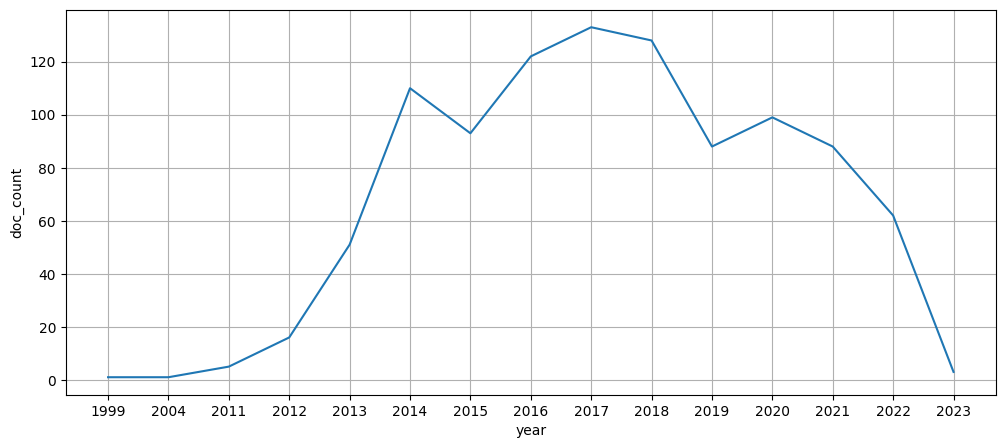

In [47]:
# 꺽은선 그래프 
# 가로 세로 비율
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc_count")
plt.grid(True)
# x축 : range(len(summary_date))
# y축 : summary_date["doc_count"]
plt.plot(range(len(summary_date)), summary_date["doc_count"] )
# x축 라벨링 옵션 
plt.xticks(range(len(summary_date)), [text for text in summary_date["출판일"]])
plt.show()

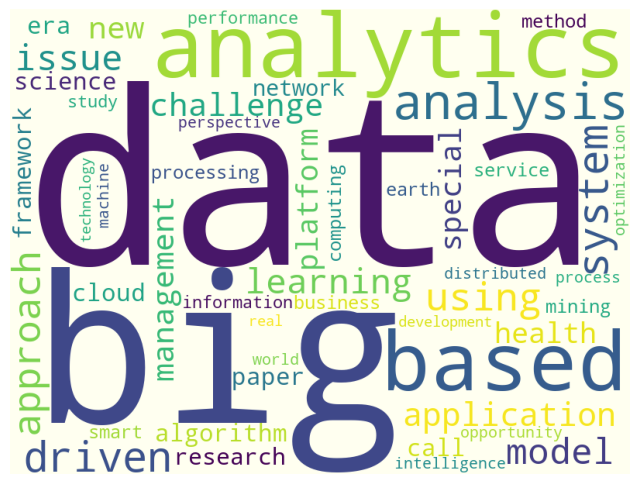

In [48]:
# 워드 클라우드 공식 문서 , 다양한 이미지 위에 처리하기. 
# https://amueller.github.io/word_cloud/index.html

# 워드 클라우드 시각화 
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="ivory", stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis("off")
plt.show()
# data': 1235,
#  'big': 1113,
#  'analytics': 110,
#  'based': 102,
#  'analysis': 93,
#  'driven': 70,
#  'system': 64,
#  'using': 57,